In [ ]:
from google.colab import drive
import numpy as np

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/updated_dataset.npz"
data = np.load(output_path)

images = data['images']
labels = data['labels']


In [ ]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (648, 224, 224, 3)
Labels shape: (648,)


In [ ]:
import tensorflow as tf

images = images / 255.0  # Normalize to [0, 1]

# Convert labels to categorical (if needed)
labels = tf.keras.utils.to_categorical(labels, num_classes=3)

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()




Saving Screenshot 2025-01-06 141827.png to Screenshot 2025-01-06 141827.png


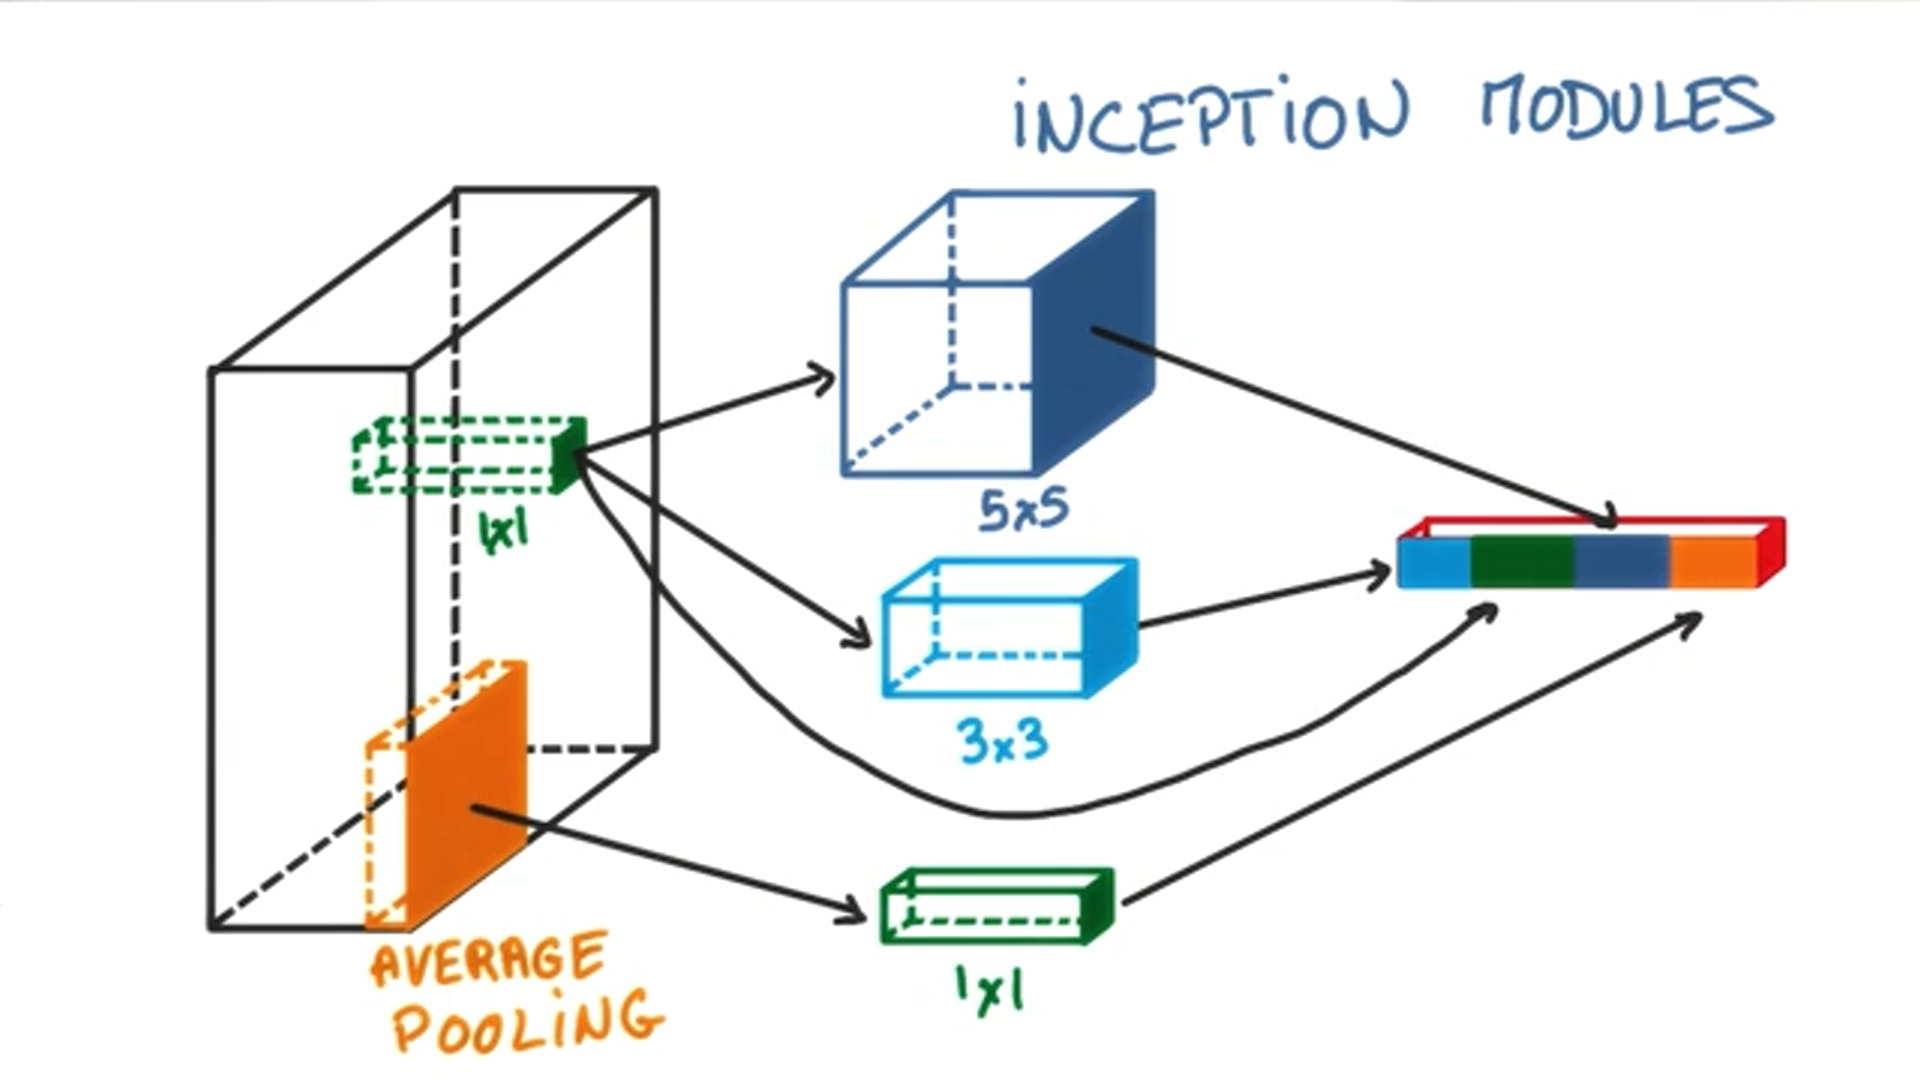

In [ ]:
 Image('Screenshot 2025-01-06 141827.png')

In [ ]:
   from sklearn.model_selection import train_test_split

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (453, 224, 224, 3) (453, 3)
Validation set shape: (97, 224, 224, 3) (97, 3)
Test set shape: (98, 224, 224, 3) (98, 3)


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build the model using Sequential
model = Sequential([
    base_model,                          # Add the pre-trained base model
    GlobalAveragePooling2D(),            # Add global average pooling layer
    Dense(128, activation='relu'),       # Add dense layer with 128 neurons
    Dense(3, activation='softmax')       # Output layer with 3 classes (softmax activation)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,065,443 (84.17 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.3382 - loss: 1.6719 - val_accuracy: 0.4330 - val_loss: 1.0685
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.4768 - loss: 1.0277 - val_accuracy: 0.4948 - val_loss: 0.9937
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5887 - loss: 0.9153 - val_accuracy: 0.4330 - val_loss: 1.0179
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5908 - loss: 0.8466 - val_accuracy: 0.6289 - val_loss: 0.8973
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.7073 - loss: 0.7360 - val_accuracy: 0.5979 - val_loss: 0.9398
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6934 - loss: 0.7240 - val_accuracy: 0.5876 - val_loss: 0.8684
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7253 - loss: 0.6352 - val_accuracy: 0.6804 - val_loss: 0.8054
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.8047 - loss: 0.5611 - val_accuracy: 0.6186 - val_loss:

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7801 - loss: 0.6147
Test accuracy: 0.7653061151504517


In [ ]:
import pandas as pd
output_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/updated_dataset.xlsx"
df = pd.read_excel(output_path)
df = df.drop("Patient Id", axis=1)
df = df.drop("History of Fracture", axis=1)
df.isna().sum()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 1. Prepare the data
X = df.drop(['Diagnosis_normal', 'Diagnosis_osteopenia', 'Diagnosis_osteoporosis'], axis=1)
y = df[['Diagnosis_normal', 'Diagnosis_osteopenia', 'Diagnosis_osteoporosis']].idxmax(axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_tabular = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Fit the model
model_tabular.fit(X_train, y_train)

# Predict on the test set
y_pred = model_tabular.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Predict on the training set to get y_train_pred
y_train_pred = model_tabular.predict(X_train) # This line was added to predict on the training data

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {accuracy}")



Train Accuracy: 0.9947916666666666
Test Accuracy: 0.9583333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

# Step 1: Get Probabilities from Both Models
tabular_probs = model_tabular.predict_proba(X_test)  # From Logistic Regression
image_probs = model.predict(X_test)                 # From InceptionV3 CNN

# Debug: Check shapes
print("Shape of tabular_probs:", tabular_probs.shape)  # Expected: (48, 3)
print("Shape of image_probs:", image_probs.shape)      # Expected: (48,)

# Fix: Convert image_probs string labels to numerical indices
label_mapping = {
    'Diagnosis_normal': 0,
    'Diagnosis_osteopenia': 1,
    'Diagnosis_osteoporosis': 2
}

if image_probs.ndim == 1 and isinstance(image_probs[0], str):
    image_probs = np.array([label_mapping[label] for label in image_probs])

# Convert numerical indices to one-hot encoded probabilities
num_classes = tabular_probs.shape[1]  # Should be 3
image_probs = to_categorical(image_probs, num_classes=num_classes)

# Debug: Check updated shape
print("Updated shape of image_probs:", image_probs.shape)  # Should be (48, 3)

# Step 2: Blending (Weighted Averaging)
final_probs = (0.5 * tabular_probs) + (0.5 * image_probs)  # Adjust weights
final_predictions = np.argmax(final_probs, axis=1)

# Fix: Ensure y_test is in numerical format
y_test = np.array([label_mapping[label] for label in y_test])  # Convert string labels to integers

# Evaluate Blended Model
print("Blended Model Performance:")
print(classification_report(y_test, final_predictions))

Shape of tabular_probs: (48, 3)
Shape of image_probs: (48,)
Updated shape of image_probs: (48, 3)
Blended Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        33
           2       1.00      0.88      0.93         8

    accuracy                           0.96        48
   macro avg       0.98      0.91      0.94        48
weighted avg       0.96      0.96      0.96        48



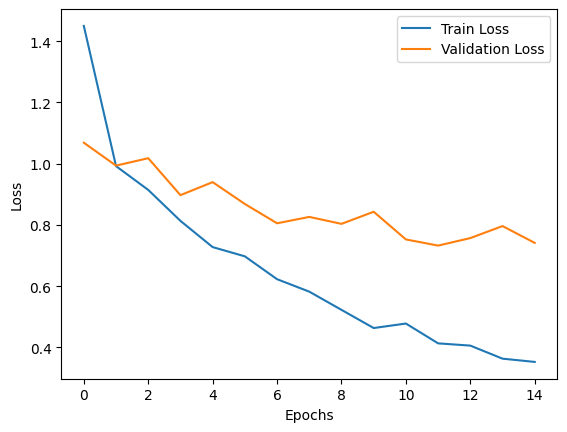

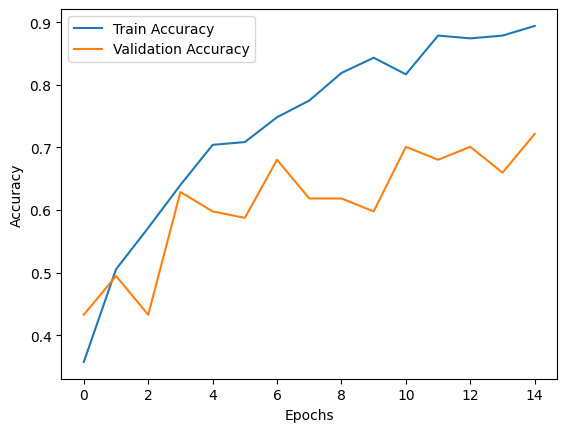

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()